# Descriptive statistics

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Importing the datasets

In [2]:
meanvar = []
for i in range(100):
    data = pd.read_csv('synthetic_data_v2010_' + str(i) + '.csv')
    meanvar.append(np.mean(data, axis=0))

In [3]:
np.mean(meanvar, axis=0), 1.96*np.std(meanvar, axis=0, ddof=1)/10

(array([ 2.00001499,  0.2000493 , -0.30092142,  0.69991017,  0.2999778 ,
         0.899807  ,  0.1998951 ]),
 array([0.00040909, 0.00020047, 0.00138772, 0.00024181, 0.00029073,
        0.00020711, 0.00026228]))

In [4]:
stdvar = []
for i in range(100):
    data = pd.read_csv('synthetic_data_v2010_' + str(i) + '.csv')
    stdvar.append(np.std(data, axis=0))

In [5]:
np.mean(stdvar, axis=0), 1.96*np.std(stdvar, axis=0, ddof=1)/10

(array([0.59991541, 0.29999947, 2.00040307, 0.39998361, 0.45824505,
        0.30025205, 0.39991784]),
 array([0.00031767, 0.00012538, 0.00081716, 0.00018105, 0.00012684,
        0.00027607, 0.00019672]))

Observations

In [6]:
acount = []
bcount = []
ycount = []
for i in range(100):
    data = pd.read_csv('synthetic_data_v2010_' + str(i) + '.csv')
    acount.append(data['A'].value_counts())
    bcount.append(data['B'].value_counts())
    ycount.append(data['Y'].value_counts())

In [7]:
np.mean(acount, axis=0), 1.96*np.std(acount, axis=0, ddof=1)

(array([70002.22, 29997.78]), array([290.72627004, 290.72627004]))

In [8]:
np.mean(bcount, axis=0), 1.96*np.std(bcount, axis=0, ddof=1)

(array([89980.7, 10019.3]), array([207.11153804, 207.11153804]))

In [9]:
np.mean(ycount, axis=0), 1.96*np.std(ycount, axis=0, ddof=1)

(array([80010.49, 19989.51]), array([262.27917701, 262.27917701]))

### Imbalance

In [10]:
IRa = []
IRb = []
IRy = []
for i in range(100):
    IRa.append(max(acount[i])/min(acount[i]))
    IRb.append(max(bcount[i])/min(bcount[i]))
    IRy.append(max(ycount[i])/min(ycount[i]))

In [11]:
np.mean(IRa), 1.96*np.std(IRa)/10

(2.333660666863267, 0.0032129538427438063)

In [12]:
np.mean(IRb), 1.96*np.std(IRb)/10

(8.98183975746861, 0.020595747138627024)

In [13]:
np.mean(IRy), 1.96*np.std(IRy)/10

(4.002845617071072, 0.006525242368388723)

### Corr

In [14]:
corrmat = []
for i in range(100):
    data = pd.read_csv('synthetic_data_v2010_' + str(i) + '.csv')
    corrmat.append(np.array(data.corr()))

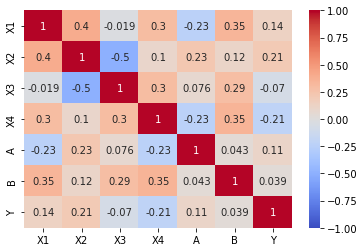

In [15]:
sns.heatmap(np.mean(np.array(corrmat), axis=0), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.xticks([i+0.5 for i in range(7)], list(data.columns))
plt.yticks([i+0.5 for i in range(7)], list(data.columns))
# plt.title('Heatmap of the correlations between variables')
plt.savefig('heatmap_sim_v2710.jpg')
plt.show()

In [16]:
np.mean(np.array(corrmat), axis=0)

array([[ 1.        ,  0.39902302, -0.01902934,  0.30012376, -0.22773943,
         0.35128656,  0.13949492],
       [ 0.39902302,  1.        , -0.49992141,  0.09993382,  0.22775392,
         0.11678979,  0.20979172],
       [-0.01902934, -0.49992141,  1.        ,  0.30027203,  0.07560588,
         0.29278806, -0.06999504],
       [ 0.30012376,  0.09993382,  0.30027203,  1.        , -0.22774562,
         0.35165726, -0.20996697],
       [-0.22773943,  0.22775392,  0.07560588, -0.22774562,  1.        ,
         0.04267722,  0.11127525],
       [ 0.35128656,  0.11678979,  0.29278806,  0.35165726,  0.04267722,
         1.        ,  0.03895568],
       [ 0.13949492,  0.20979172, -0.06999504, -0.20996697,  0.11127525,
         0.03895568,  1.        ]])

### Group-wise output imbalance

In [17]:
cross = []
for i in range(100):
    data = pd.read_csv('synthetic_data_v2010_' + str(i) + '.csv')
    cross.append(np.array(pd.crosstab(data['A'], data['Y'])))

In [18]:
np.mean(cross, axis=0), 1.96*np.std(cross, axis=0, ddof=1)/10

(array([[58048.36, 11953.86],
        [21962.13,  8035.65]]),
 array([[33.08120192, 21.7566692 ],
        [26.36681702, 15.48745486]]))

In [19]:
IRAY = []
for i in range(100):
    data = pd.read_csv('synthetic_data_v2010_' + str(i) + '.csv')
    IRAY.append([max(data[data['A']==a]['Y'].value_counts())/min(data[data['A']==a]['Y'].value_counts()) for a in [0,1]])

In [20]:
np.mean(IRAY, axis=0), 1.96*np.std(IRAY, axis=0, ddof=1)/10

(array([4.85651281, 2.73336733]), array([0.01046852, 0.00652259]))

In [21]:
cross = []
for i in range(100):
    data = pd.read_csv('synthetic_data_v2010_' + str(i) + '.csv')
    cross.append(np.array(pd.crosstab(data['B'], data['Y'])))

In [22]:
np.mean(cross, axis=0), 1.96*np.std(cross, axis=0, ddof=1)/10

(array([[ 8484.3 ,  1535.  ],
        [71526.19, 18454.51]]),
 array([[19.8242263 ,  7.31595442],
        [30.21667078, 25.24790808]]))

In [23]:
IRBY = []
for i in range(100):
    data = pd.read_csv('synthetic_data_v2010_' + str(i) + '.csv')
    IRBY.append([max(data[data['B']==b]['Y'].value_counts())/min(data[data['B']==b]['Y'].value_counts()) for b in [0,1]])

In [24]:
np.mean(IRBY, axis=0), 1.96*np.std(IRBY, axis=0, ddof=1)/10

(array([5.53056942, 3.87604021]), array([0.03011812, 0.00659976]))

Corr between the X

In [25]:
data = pd.DataFrame(np.mean([pd.read_csv('synthetic_data_v2010_' + str(i) + '.csv') for i in range(100)], axis=0), columns=pd.read_csv('synthetic_data_v2010_0.csv').columns)

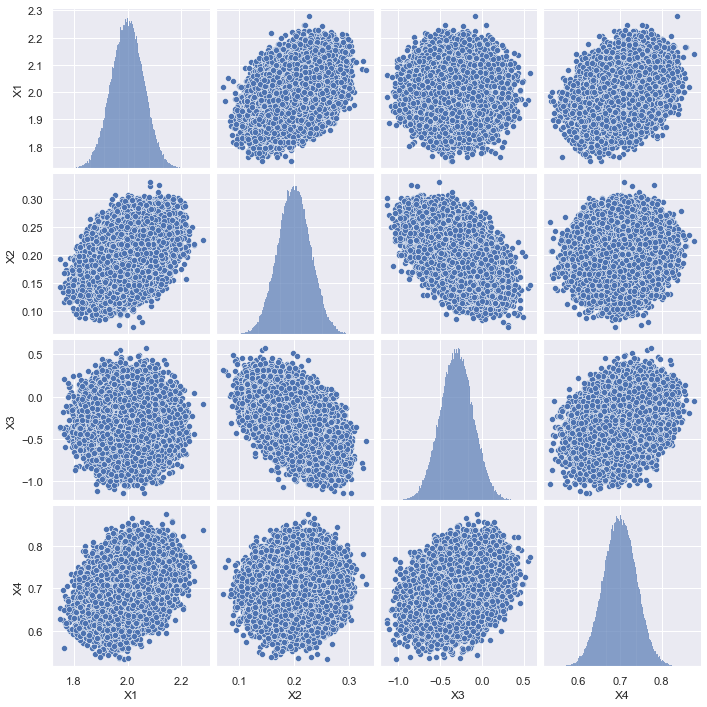

In [26]:
sns.set()
sns.pairplot(data.iloc[:, :-3])
plt.savefig('pairplots_sim_v2710')

Outliers

In [ ]:
# for var in data.columns:
#     low_range = data[var][data[var].argsort()][:5]
#     high_range= data[var][data[var].argsort()][-5:]
#     print('\nFor ' + str(var))
#     print('outer range (low) of the distribution:')
#     print(low_range)
#     print('\nouter range (high) of the distribution:')
#     print(high_range)